### GEBCO 2020 bathymetry data for SVB

New downloades file from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Area bounded by N 35, E -113.5, S 27, W -122.


In [1]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
nc_file = '../../bathy/GEBCO_SVB/GEBCO_2020_10_Feb_2021_824964c84a3d/gebco_2020_n36.0_s26.0_w-122.0_e-113.5.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2400,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (2040,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

In [3]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

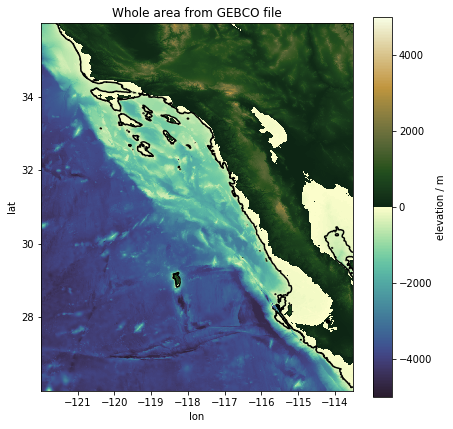

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon,lat, elev, cmap=cmo.cm.topo, vmin=-5000, vmax=5000)

cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='k', levels=[250])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Whole area from GEBCO file')

ax.set_aspect(1)

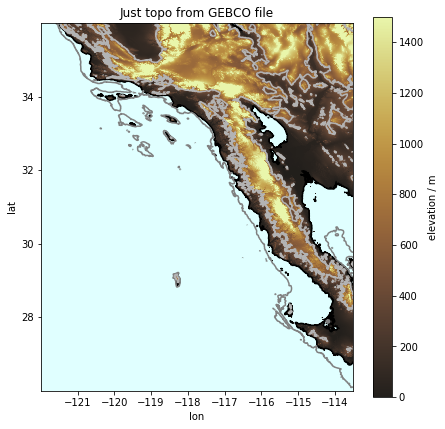

In [5]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.set_facecolor('lightcyan')
ocean_masked = np.ma.masked_less(elev,0)
ocean_mask = np.ma.getmask(ocean_masked)
just_land = np.ma.masked_array(elev,mask=ocean_mask)
pc2 = ax.pcolormesh(lon,lat, just_land, cmap=cmo.cm.turbid_r, vmin=0, vmax=1500)
cb = plt.colorbar(pc2)
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, just_land, colors='0.7', levels=[500])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Just topo from GEBCO file')

ax.set_aspect(1)

5083


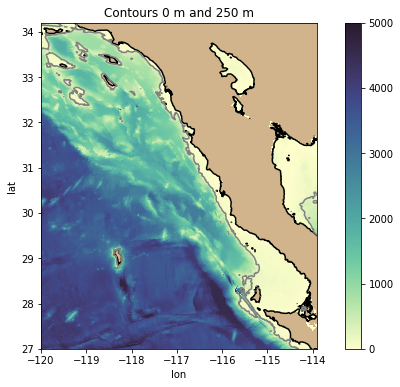

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.set_facecolor('tan')
mask_elev = np.ma.masked_greater(elev,0)
pc = ax.pcolormesh(lon,lat, -mask_elev, cmap=cmo.cm.deep, vmin=0, vmax=5000)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors=['k','0.5'], levels=[0,250])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Contours 0 m and 250 m')
ax.set_ylim(27.0,34.2)
ax.set_xlim(-120,-113.9)
ax.set_aspect(1)
print(np.max(-mask_elev))

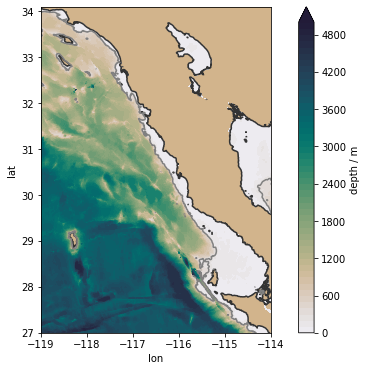

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat, -mask_elev,50, cmap=cmo.cm.rain, vmin=0, vmax=5000, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon, lat, -elev, colors=['0.2','0.5'], levels=[0,250])
ax.set_ylim(27.0,34.1)
ax.set_xlim(-119,-114)
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_aspect(1)

Maybe get rid of islands in California and Isla Guadalupe for the idealized model

Another good thing about this domain ia that I can get rid of the northern open boundary.

Maybe the Bay is too close to the souther boundary.